# 30-Day Readmission Feature Exploration

Exploratory figures highlighting feature distributions that relate to the `readmit_label` target.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.options.display.max_columns = None


In [2]:
# Load feature table
DATA_PATH = '../datasets/readmission_features_30d_v1.csv'
data = pd.read_csv(DATA_PATH)
print(f'Rows: {len(data):,}, Columns: {data.shape[1]}')
data.head()


Rows: 546,028, Columns: 51


,subject_id,hadm_id,admittime,dischtime,readmit_label,days_since_prev_discharge,has_prior_admission,ed_visit_flag,ed_los_hours,length_of_stay,num_transfers,unique_careunits,had_icu_transfer_flag,last_service,is_surgical_service,gender,anchor_age,language,ethnicity,marital_status,insurance,admission_type,admission_location,discharge_location,num_diagnoses,died_in_hospital,death_within_window,Creatinine_min,Glucose_min,Hemoglobin_min,PlateletCount_min,Potassium_min,Sodium_min,UreaNitrogen_min,WBC_min,Creatinine_median,Glucose_median,Hemoglobin_median,PlateletCount_median,Potassium_median,Sodium_median,UreaNitrogen_median,WBC_median,Creatinine_max,Glucose_max,Hemoglobin_max,PlateletCount_max,Potassium_max,Sodium_max,UreaNitrogen_max,WBC_max
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,0,NaN,0,1,4.216667,0.786111,3.0,3.0,0.0,MED,0.0,F,52,English,NaN,WIDOWED,Medicaid,URGENT,TRANSFER FROM HOSPITAL,HOME,8.0,0,0,0.3,99.0,12.7,71.0,4.5,137.0,25.0,NaN,0.3,99.0,12.70,71.0,4.50,137.0,25.0,NaN,0.3,99.0,12.7,71.0,4.5,137.0,25.0,NaN
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,1,50.0,1,1,5.616667,1.015278,3.0,3.0,0.0,MED,0.0,F,52,English,NaN,WIDOWED,Medicaid,EW EMER.,EMERGENCY ROOM,HOME,8.0,0,0,0.3,71.0,12.4,137.0,5.2,126.0,29.0,13.0,0.3,71.0,12.40,137.0,5.20,126.0,29.0,13.0,0.3,71.0,12.4,137.0,5.2,126.0,29.0,13.0
2,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,1,25.0,1,1,8.100000,2.222222,6.0,4.0,1.0,MED,0.0,F,52,English,NaN,WIDOWED,Medicaid,EW EMER.,EMERGENCY ROOM,HOME,13.0,0,0,0.4,107.0,11.2,94.0,4.7,130.0,28.0,NaN,0.4,115.0,11.55,94.5,5.00,130.0,33.0,NaN,0.5,121.0,11.9,95.0,5.2,132.0,35.0,NaN
3,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,0,11.0,1,1,4.766667,1.754167,3.0,3.0,0.0,MED,0.0,F,52,English,NaN,WIDOWED,Medicaid,EW EMER.,EMERGENCY ROOM,HOSPICE,10.0,0,0,0.4,87.0,11.6,107.0,5.3,119.0,28.0,NaN,0.4,95.0,11.85,120.0,5.85,123.0,29.0,NaN,0.6,102.0,12.1,133.0,6.9,126.0,37.0,NaN
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,0,NaN,0,1,8.516667,0.298611,3.0,3.0,0.0,MED,0.0,F,19,English,NaN,SINGLE,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


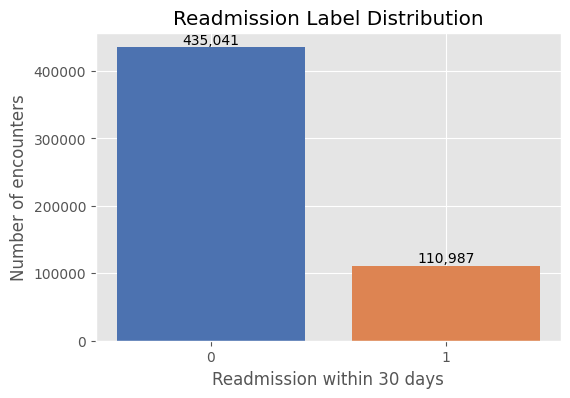

In [3]:
# Readmission label balance
fig, ax = plt.subplots(figsize=(6, 4))
label_counts = data['readmit_label'].value_counts().sort_index()
ax.bar(label_counts.index.astype(str), label_counts.values, color=['#4C72B0', '#DD8452'])
ax.set_xlabel('Readmission within 30 days')
ax.set_ylabel('Number of encounters')
ax.set_title('Readmission Label Distribution')
for bar in ax.patches:
    ax.annotate(f"{int(bar.get_height()):,}", (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.show()


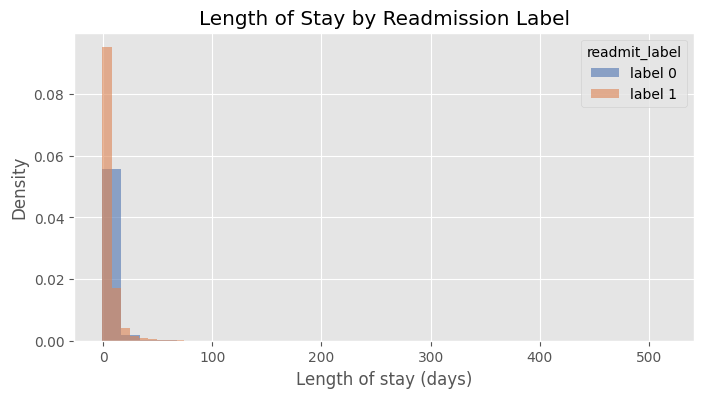

In [4]:
# Length of stay distributions separated by label
fig, ax = plt.subplots(figsize=(8, 4))
colors = {0: '#4C72B0', 1: '#DD8452'}
for label, color in colors.items():
    los = data.loc[data['readmit_label'] == label, 'length_of_stay'].dropna()
    ax.hist(los, bins=30, alpha=0.6, label=f'label {label}', color=color, density=True)
ax.set_xlabel('Length of stay (days)')
ax.set_ylabel('Density')
ax.set_title('Length of Stay by Readmission Label')
ax.legend(title='readmit_label')
plt.show()


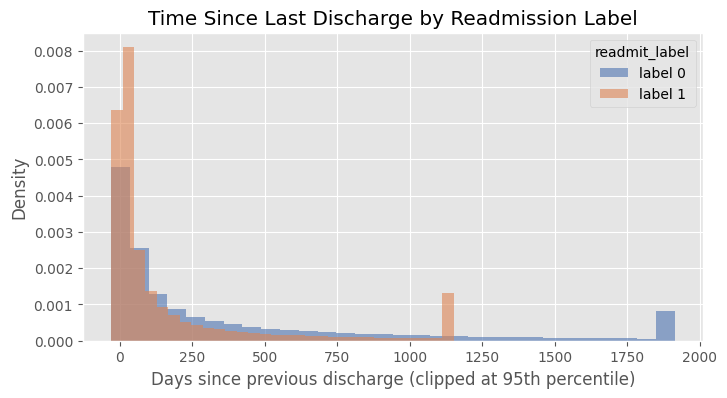

In [5]:
# Days since previous discharge vs readmission status
fig, ax = plt.subplots(figsize=(8, 4))
for label, color in colors.items():
    delta = data.loc[data['readmit_label'] == label, 'days_since_prev_discharge'].dropna()
    clipped = delta.clip(upper=np.nanpercentile(delta, 95))
    ax.hist(clipped, bins=30, alpha=0.6, label=f'label {label}', color=color, density=True)
ax.set_xlabel('Days since previous discharge (clipped at 95th percentile)')
ax.set_ylabel('Density')
ax.set_title('Time Since Last Discharge by Readmission Label')
ax.legend(title='readmit_label')
plt.show()


/var/folders/n1/5thhkqvx26b2t3hjx886_mb80000gn/T/ipykernel_56173/4034678010.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(groups, labels=['label 0', 'label 1'], patch_artist=True,


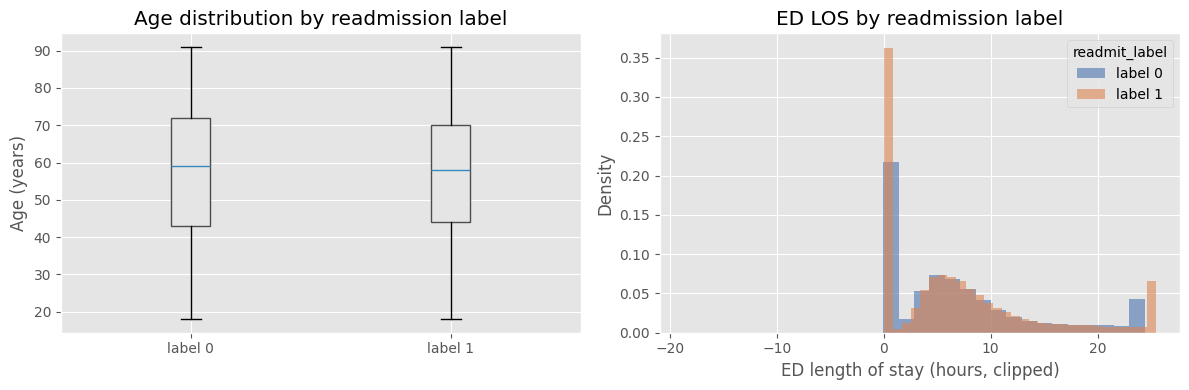

In [6]:
# Age and ED length of stay summaries
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

groups = [data.loc[data['readmit_label'] == label, 'anchor_age'].dropna() for label in colors]
ax1.boxplot(groups, labels=['label 0', 'label 1'], patch_artist=True,
           boxprops=dict(facecolor='#E5E5E5', color='#4C4C4C'))
ax1.set_ylabel('Age (years)')
ax1.set_title('Age distribution by readmission label')

for label, color, axis in zip(colors, colors.values(), [ax2, ax2]):
    subset = data.loc[data['readmit_label'] == label, 'ed_los_hours'].dropna()
    axis.hist(subset.clip(upper=np.nanpercentile(subset, 95)), bins=30, alpha=0.6,
              color=color, label=f'label {label}', density=True)
ax2.set_xlabel('ED length of stay (hours, clipped)')
ax2.set_ylabel('Density')
ax2.set_title('ED LOS by readmission label')
ax2.legend(title='readmit_label')

plt.tight_layout()
plt.show()


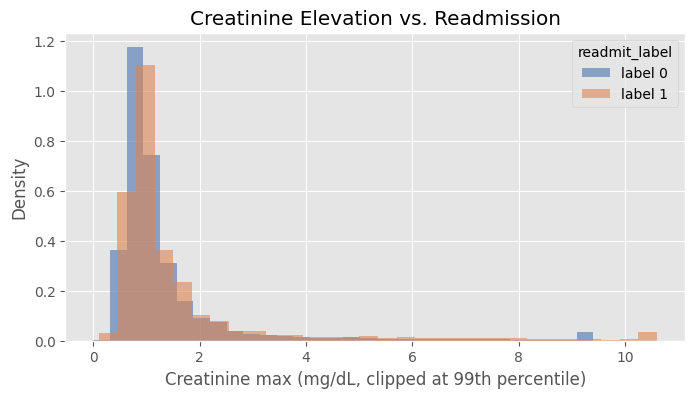

In [7]:
# Distribution of maximum creatinine values
fig, ax = plt.subplots(figsize=(8, 4))
for label, color in colors.items():
    series = data.loc[data['readmit_label'] == label, 'Creatinine_max'].dropna()
    clipped = series.clip(upper=np.nanpercentile(series, 99))
    ax.hist(clipped, bins=30, density=True, alpha=0.6, color=color, label=f'label {label}')
ax.set_xlabel('Creatinine max (mg/dL, clipped at 99th percentile)')
ax.set_ylabel('Density')
ax.set_title('Creatinine Elevation vs. Readmission')
ax.legend(title='readmit_label')
plt.show()


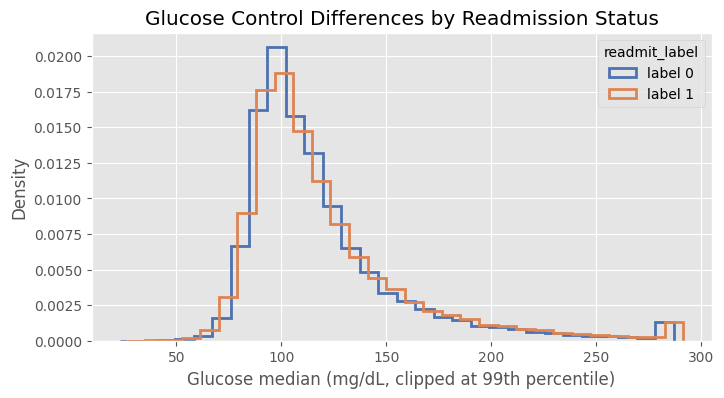

In [8]:
# Median glucose concentration across labels
fig, ax = plt.subplots(figsize=(8, 4))
for label, color in colors.items():
    series = data.loc[data['readmit_label'] == label, 'Glucose_median'].dropna()
    clipped = series.clip(upper=np.nanpercentile(series, 99))
    ax.hist(clipped, bins=30, density=True, histtype='step', linewidth=2, color=color, label=f'label {label}')
ax.set_xlabel('Glucose median (mg/dL, clipped at 99th percentile)')
ax.set_ylabel('Density')
ax.set_title('Glucose Control Differences by Readmission Status')
ax.legend(title='readmit_label')
plt.show()


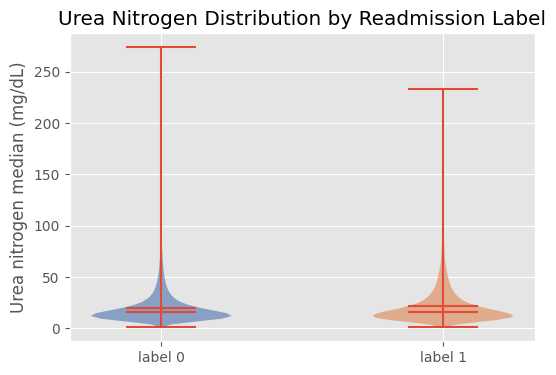

In [9]:
# Urea nitrogen as a kidney function marker
fig, ax = plt.subplots(figsize=(6, 4))
values = [
    data.loc[data['readmit_label'] == label, 'UreaNitrogen_median'].dropna()
    for label in colors
]
violins = ax.violinplot(values, showmeans=True, showmedians=True)
for body, color in zip(violins['bodies'], colors.values()):
    body.set_facecolor(color)
    body.set_alpha(0.6)
ax.set_xticks([1, 2])
ax.set_xticklabels(['label 0', 'label 1'])
ax.set_ylabel('Urea nitrogen median (mg/dL)')
ax.set_title('Urea Nitrogen Distribution by Readmission Label')
plt.show()
